# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Stock Data

## Import

In [2]:
# get data prepped from 'monthly_fin_data'

data = pd.read_csv('/content/drive/MyDrive/fin_data/adidas_otcqx_djia (2).csv')

In [3]:
data.head(2)

,Date,adidas_Price,adidas_Open,adidas_High,adidas_Low,adidas_Vol.,adidas_Change %,adidas_Volume,adidas_PercentChange,adidas_PriceMA,...,otcqx_PercentChangeMA,djia_Price,djia_Open,djia_High,djia_Low,djia_Vol.,djia_Change %,djia_PercentChange,djia_PriceMA,djia_PercentChangeMA
0,2013-01-06,89.74,89.74,89.74,89.74,0.10K,3.51%,100.0,3.51,NaN,...,NaN,13488.43,"13,436.13","13,496.68","13,293.13",618.48M,0.40%,0.4,NaN,NaN
1,2013-01-13,93.31,91.15,93.31,91.15,0.37K,3.98%,370.0,3.98,NaN,...,NaN,13649.70,"13,488.43","13,649.93","13,445.80",784.08M,1.20%,1.2,NaN,NaN


## Prep

In [4]:
data.columns

Index(['Date', 'adidas_Price', 'adidas_Open', 'adidas_High', 'adidas_Low',
       'adidas_Vol.', 'adidas_Change %', 'adidas_Volume',
       'adidas_PercentChange', 'adidas_PriceMA', 'adidas_PercentChangeMA',
       'otcqx_Price', 'otcqx_Open', 'otcqx_High', 'otcqx_Low', 'otcqx_Vol.',
       'otcqx_Change %', 'otcqx_PercentChange', 'otcqx_PriceMA',
       'otcqx_PercentChangeMA', 'djia_Price', 'djia_Open', 'djia_High',
       'djia_Low', 'djia_Vol.', 'djia_Change %', 'djia_PercentChange',
       'djia_PriceMA', 'djia_PercentChangeMA'],
      dtype='object')

In [5]:
# drop unnecessary columns

data = data.drop(['adidas_Open', 'adidas_High', 'adidas_Low',
       'adidas_Vol.', 'adidas_Change %',
       'otcqx_Price', 'otcqx_Open', 'otcqx_High', 'otcqx_Low', 'otcqx_Vol.',
       'otcqx_Change %', 'otcqx_PercentChange', 'otcqx_PriceMA',
       'otcqx_PercentChangeMA', 'djia_Open', 'djia_High',
       'djia_Low', 'djia_Vol.', 'djia_Change %'], axis=1)

In [6]:
# set datetime index

data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')
data = data.sort_index()

data.head()

,adidas_Price,adidas_Volume,adidas_PercentChange,adidas_PriceMA,adidas_PercentChangeMA,djia_Price,djia_PercentChange,djia_PriceMA,djia_PercentChangeMA
Date,,,,,,,,,
2013-01-06,89.74,100.0,3.51,NaN,NaN,13488.43,0.40,NaN,NaN
2013-01-13,93.31,370.0,3.98,NaN,NaN,13649.70,1.20,NaN,NaN
2013-01-20,93.00,570.0,-0.33,NaN,NaN,13895.98,1.80,NaN,NaN
2013-01-27,95.69,100.0,2.89,NaN,NaN,14009.79,0.82,NaN,NaN
2013-02-03,91.15,27670.0,-4.74,NaN,NaN,13992.97,-0.12,NaN,NaN


In [7]:
# option to look at 52-week moving average

# data['adidas_PercentChangeMA_52'] = data['adidas_PercentChange'].rolling(window=52).mean()
# data['djia_PercentChangeMA_52'] = data['djia_PercentChange'].rolling(window=52).mean()

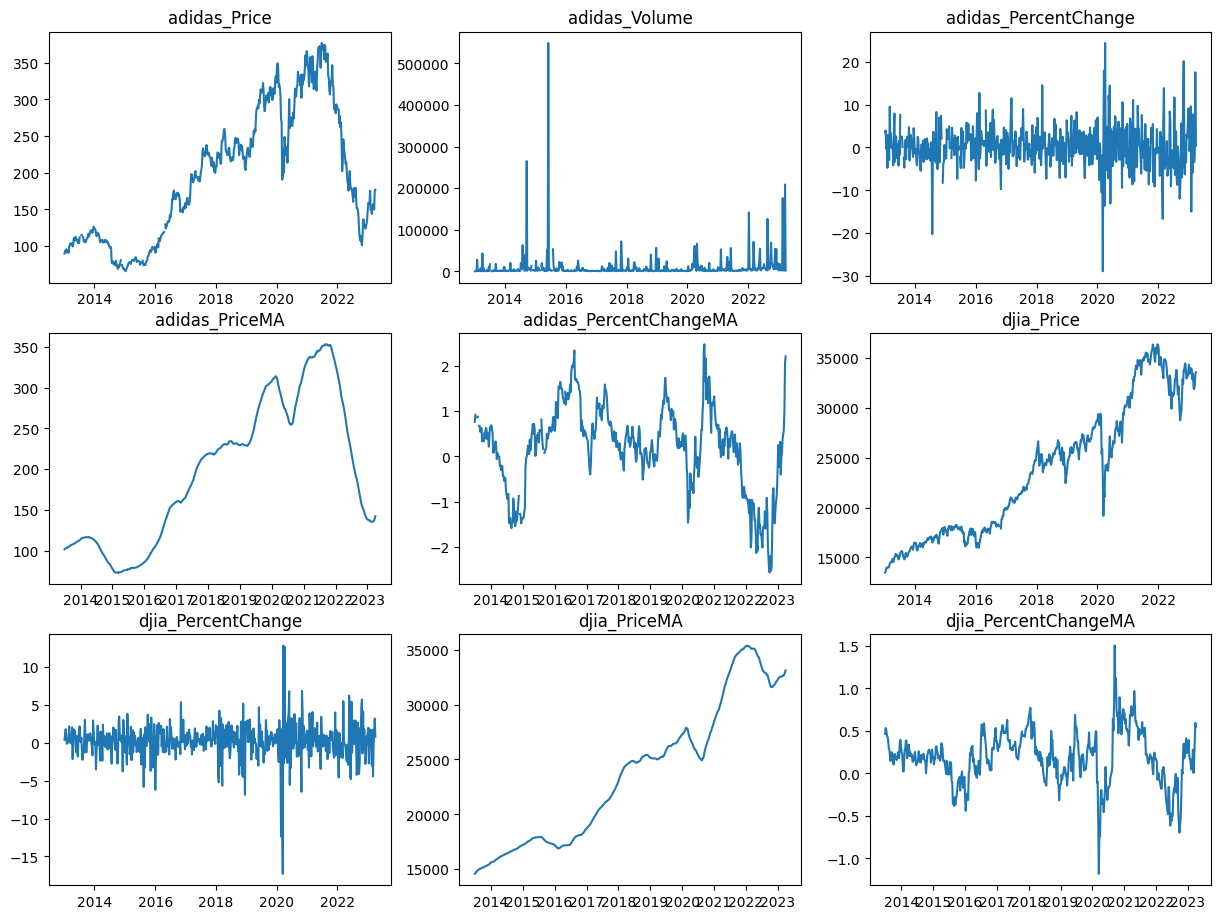

In [8]:
# visualize data

m = 4 # columns
n = 3 # rows

fig = plt.figure(figsize=(15,15))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(m, n, i+1)
    ax.plot(data[col])
    ax.set_title(col)

plt.show()

In [9]:
# select stock data for model

lm_data = data.copy()
lm_data = lm_data[['adidas_PercentChangeMA', 'djia_PercentChangeMA']] # , 'adidas_PercentChangeMA_52', 'djia_PercentChangeMA_52']]
lm_data.tail()

,adidas_PercentChangeMA,djia_PercentChangeMA
Date,,
2023-03-12,0.582692,0.159231
2023-03-19,0.993077,0.358462
2023-03-26,2.041154,0.594231
2023-04-02,2.204231,0.550000
2023-04-09,NaN,NaN


<Axes: xlabel='Date'>

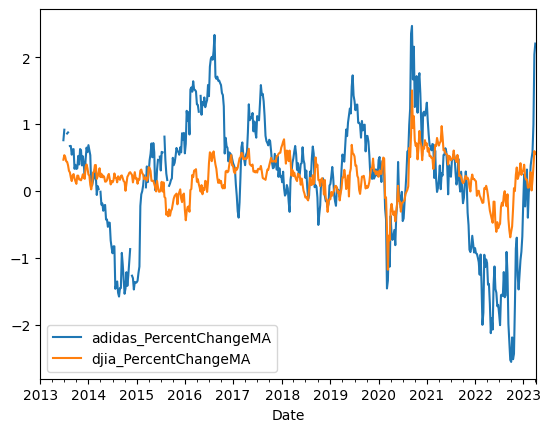

In [10]:
lm_data.plot()

# Sentiment data

## Hugging Face

In [11]:
# get sentiment scores

sent_data = pd.read_csv('/content/drive/MyDrive/SI 699/Final Documents/Sentiment_Analysis_Data.csv')

In [12]:
sent_data.columns

Index(['Unnamed: 0', 'Date', 'Link', 'Header', 'Article', 'Article_str',
       'headline_person_ner', 'article_person_ner', 'kim_in_header',
       'kim_in_article', 'kanye_in_header', 'kanye_in_article', 'no_punc_data',
       'msg_tokenized', 'no_stopwords', 'msg_stemmed', 'msg_lemmatized',
       'nltk_score', 'nltk_positive', 'nltk_negative', 'nltk_neutral',
       'nltk_compound', 'hug_face_bertweet', 'hg_positive', 'hg_negative',
       'hg_neutral', 'hg_positive_count', 'hg_negative_count',
       'hg_neutral_count', 'hg_positive_score_avg', 'hg_negative_score_avg',
       'hg_neutral_score_avg', 'hg_positive_score_med',
       'hg_negative_score_med', 'hg_neutral_score_med',
       'hg_positive_score_max', 'hg_negative_score_max',
       'hg_neutral_score_max', 'year', 'day', 'month', 'date', 'week',
       'final_sentiment', 'final_score', 'final_sentiment_pos_neg',
       'final_score_pos_neg'],
      dtype='object')

In [13]:
# retain relevant columns

sent_data = sent_data[['Date', 'final_sentiment', 'final_score', 'final_sentiment_pos_neg', 'final_score_pos_neg']]

In [14]:
sent_data['final_sentiment'].value_counts()

neutral     926
positive     21
negative     11
Name: final_sentiment, dtype: int64

In [15]:
sent_data['final_sentiment_pos_neg'].value_counts()

negative    506
positive    452
Name: final_sentiment_pos_neg, dtype: int64

In [16]:
# set datetime index

sent_data.Date = pd.to_datetime(sent_data.Date)
sent_data = sent_data.set_index('Date')
sent_data = sent_data.sort_index()

sent_data.head()

,final_sentiment,final_score,final_sentiment_pos_neg,final_score_pos_neg
Date,,,,
2014-06-01,neutral,0.89,positive,0.80
2014-06-08,neutral,0.90,negative,0.83
2014-06-10,neutral,0.84,negative,0.80
2014-06-17,neutral,0.82,positive,0.80
2014-06-26,neutral,0.85,positive,0.83


In [17]:
def pn_score(row):
  '''
  params: row of a dataframe
  returns: adjusted positive/negative score (sign matches score)

  this function should be implemented in df.apply() and used to create a new
  column for the dataframe, with scores labeled "positive" > 0 and scores
  labeled "negative" < 0
  '''
  if row['final_sentiment_pos_neg']=='negative':
    return -1 * row['final_score_pos_neg']
  else:
    return row['final_score_pos_neg']

sent_data['pn_score'] = sent_data.apply(lambda row: pn_score(row), axis=1)
sent_data.head()

,final_sentiment,final_score,final_sentiment_pos_neg,final_score_pos_neg,pn_score
Date,,,,,
2014-06-01,neutral,0.89,positive,0.80,0.80
2014-06-08,neutral,0.90,negative,0.83,-0.83
2014-06-10,neutral,0.84,negative,0.80,-0.80
2014-06-17,neutral,0.82,positive,0.80,0.80
2014-06-26,neutral,0.85,positive,0.83,0.83


In [18]:
# encode categorial columns

sent_data = pd.get_dummies(sent_data, prefix=['final_sentiment', 'final_sentiment_pos_neg'])

In [19]:
# compress to match dates in stock dataframe

compressed_sent = sent_data.resample('W').median().dropna()
compressed_sent.head()

,final_score,final_score_pos_neg,pn_score,final_sentiment_negative,final_sentiment_neutral,final_sentiment_positive,final_sentiment_pos_neg_negative,final_sentiment_pos_neg_positive
Date,,,,,,,,
2014-06-01,0.89,0.80,0.80,0.0,1.0,0.0,0.0,1.0
2014-06-08,0.90,0.83,-0.83,0.0,1.0,0.0,1.0,0.0
2014-06-15,0.84,0.80,-0.80,0.0,1.0,0.0,1.0,0.0
2014-06-22,0.82,0.80,0.80,0.0,1.0,0.0,0.0,1.0
2014-06-29,0.85,0.83,0.83,0.0,1.0,0.0,0.0,1.0


In [20]:
for col in ['final_score', 'pn_score']:
  new = col + '_MA'
  compressed_sent[new] = compressed_sent[col].rolling(window=26).mean()

compressed_sent.tail()

,final_score,final_score_pos_neg,pn_score,final_sentiment_negative,final_sentiment_neutral,final_sentiment_positive,final_sentiment_pos_neg_negative,final_sentiment_pos_neg_positive,final_score_MA,pn_score_MA
Date,,,,,,,,,,
2023-01-22,0.870,0.825,0.760,0.0,1.0,0.0,0.0,1.0,0.853846,-0.408846
2023-01-29,0.900,0.820,-0.770,0.0,1.0,0.0,1.0,0.0,0.855769,-0.471154
2023-02-05,0.850,0.860,0.800,0.0,1.0,0.0,0.0,1.0,0.855385,-0.471923
2023-02-19,0.845,0.905,0.905,0.0,1.0,0.0,0.0,1.0,0.855577,-0.402500
2023-03-12,0.880,0.900,0.900,0.0,1.0,0.0,0.0,1.0,0.855962,-0.395192


In [21]:
# nltk_sents = compressed_sent[compressed_sent.columns[4:]]
# lm = pd.merge(lm_data, nltk_sents, left_index=True, right_index=True)

# lm.tail()

lm_huggingface = pd.merge(lm_data, compressed_sent, left_index=True, right_index=True)
lm_huggingface.to_csv('lm_huggingface.csv')

## NLTK

In [22]:
sent_data2 = pd.read_csv('/content/drive/MyDrive/SI 699/Final Documents/Sentiment_Analysis_Data.csv')

In [23]:
sent_data2.columns

Index(['Unnamed: 0', 'Date', 'Link', 'Header', 'Article', 'Article_str',
       'headline_person_ner', 'article_person_ner', 'kim_in_header',
       'kim_in_article', 'kanye_in_header', 'kanye_in_article', 'no_punc_data',
       'msg_tokenized', 'no_stopwords', 'msg_stemmed', 'msg_lemmatized',
       'nltk_score', 'nltk_positive', 'nltk_negative', 'nltk_neutral',
       'nltk_compound', 'hug_face_bertweet', 'hg_positive', 'hg_negative',
       'hg_neutral', 'hg_positive_count', 'hg_negative_count',
       'hg_neutral_count', 'hg_positive_score_avg', 'hg_negative_score_avg',
       'hg_neutral_score_avg', 'hg_positive_score_med',
       'hg_negative_score_med', 'hg_neutral_score_med',
       'hg_positive_score_max', 'hg_negative_score_max',
       'hg_neutral_score_max', 'year', 'day', 'month', 'date', 'week',
       'final_sentiment', 'final_score', 'final_sentiment_pos_neg',
       'final_score_pos_neg'],
      dtype='object')

In [24]:
sent_data2 = sent_data2[['Date', 'nltk_positive', 'nltk_negative', 'nltk_neutral', 'nltk_compound']]

In [25]:
# set datetime index

sent_data2.Date = pd.to_datetime(sent_data2.Date)
sent_data2 = sent_data2.set_index('Date')
sent_data2 = sent_data2.sort_index()

sent_data2.head()

,nltk_positive,nltk_negative,nltk_neutral,nltk_compound
Date,,,,
2014-06-01,0.188,0.006,0.806,0.9934
2014-06-08,0.059,0.054,0.887,-0.2609
2014-06-10,0.090,0.035,0.876,0.9655
2014-06-17,0.151,0.038,0.811,0.9964
2014-06-26,0.121,0.000,0.879,0.9781


In [26]:
# compress to match dates in stock dataframe

compressed_sent2 = sent_data2.resample('W').mean().dropna()
compressed_sent2.head()

,nltk_positive,nltk_negative,nltk_neutral,nltk_compound
Date,,,,
2014-06-01,0.188,0.006,0.806,0.9934
2014-06-08,0.059,0.054,0.887,-0.2609
2014-06-15,0.090,0.035,0.876,0.9655
2014-06-22,0.151,0.038,0.811,0.9964
2014-06-29,0.121,0.000,0.879,0.9781


In [27]:
for col in compressed_sent2.columns:
  new = col + '_MA'
  compressed_sent2[new] = compressed_sent2[col].rolling(window=26).mean()

compressed_sent2.tail()

,nltk_positive,nltk_negative,nltk_neutral,nltk_compound,nltk_positive_MA,nltk_negative_MA,nltk_neutral_MA,nltk_compound_MA
Date,,,,,,,,
2023-01-22,0.115750,0.021000,0.863250,0.990625,0.110410,0.052482,0.837184,0.736549
2023-01-29,0.097667,0.038000,0.864333,0.982567,0.109282,0.052885,0.837889,0.736115
2023-02-05,0.144667,0.033333,0.822333,0.987867,0.109019,0.053110,0.837940,0.735739
2023-02-19,0.151000,0.023500,0.825000,0.993250,0.109212,0.052283,0.838556,0.735706
2023-03-12,0.120500,0.016000,0.863500,0.989350,0.109346,0.051052,0.839652,0.735623


In [28]:
lm = pd.merge(lm_data, compressed_sent2, left_index=True, right_index=True).dropna()
lm.to_csv('lm.csv')